In [59]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [3]:
df = pd.read_csv("data_A.csv", delimiter= ",")

In [4]:
df.head(10)

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,7317,15637411,Tochukwu,749.0,France,Male,30.0,1,0.00,2,0,0,126551.65,1
1,1,11125,15745307,Martin,683.0,Germany,Male,32.0,7,121887.91,1,1,1,176570.46,0
2,2,45720,15677382,Aitken,711.0,Spain,Female,33.0,5,0.00,2,1,0,162703.80,0
3,3,74042,15694450,Tuan,722.0,France,Female,28.0,4,0.00,2,1,1,76615.31,0
4,4,109985,15734987,Aitken,754.0,France,Female,67.0,3,0.00,2,1,1,114514.92,0
5,5,115284,15798024,Calabresi,543.0,France,Male,34.0,6,0.00,2,1,1,70810.80,0
6,6,132129,15658852,Li,705.0,France,Female,46.0,3,0.00,1,1,0,119484.01,1
7,7,56917,15667085,Meng,667.0,France,Male,42.0,4,0.00,1,1,0,131834.75,1
8,8,40178,15581295,Lane,728.0,Germany,Male,32.0,6,120911.75,2,1,1,131249.46,1
9,9,119934,15600997,Oluchukwu,581.0,Spain,Male,28.0,2,0.00,2,1,1,133814.28,0


In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churn'],
      dtype='object')

In [6]:
df = df.drop(['Unnamed: 0'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               41258 non-null  int64  
 1   CustomerId       41258 non-null  int64  
 2   Surname          41258 non-null  object 
 3   CreditScore      41238 non-null  float64
 4   Geography        41258 non-null  object 
 5   Gender           41258 non-null  object 
 6   Age              41258 non-null  float64
 7   Tenure           41258 non-null  int64  
 8   Balance          41258 non-null  float64
 9   NumOfProducts    41258 non-null  int64  
 10  HasCrCard        41258 non-null  int64  
 11  IsActiveMember   41258 non-null  int64  
 12  EstimatedSalary  41258 non-null  float64
 13  churn            41258 non-null  int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 4.4+ MB


In [8]:
df.shape

(41258, 14)

In [9]:
df.churn.value_counts()

churn
0    32645
1     8613
Name: count, dtype: int64

In [10]:
df.isnull().sum()

id                  0
CustomerId          0
Surname             0
CreditScore        20
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
churn               0
dtype: int64

# Split data

In [11]:
input = df.drop(['id', 'CustomerId', 'Surname', 'churn'], axis=1)
output = df['churn']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.2, random_state = 42)

In [13]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
15731,634.0,France,Male,53.0,2,181821.96,2,1,1,36980.54
6996,581.0,France,Female,50.0,9,117565.03,2,0,0,82559.77
30824,545.0,France,Male,34.0,9,0.00,2,1,0,66393.89
40019,543.0,Spain,Male,26.0,10,117837.43,1,1,0,160528.65
21501,733.0,Spain,Male,48.0,9,0.00,1,1,0,127569.80


In [14]:
y_train.value_counts()

churn
0    26100
1     6906
Name: count, dtype: int64

In [15]:
x_train.shape

(33006, 10)

In [16]:
x_train.isnull().sum()

CreditScore        14
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
dtype: int64

In [17]:
x_test.isnull().sum()

CreditScore        6
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [18]:
#Fill NA value with median
cs = ['CreditScore']
imputer = SimpleImputer(strategy='median')
x_test[cs] = imputer.fit_transform(x_test[cs])
x_train[cs] = imputer.fit_transform(x_train[cs])

In [19]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categoric = ['Geography', 'Gender']

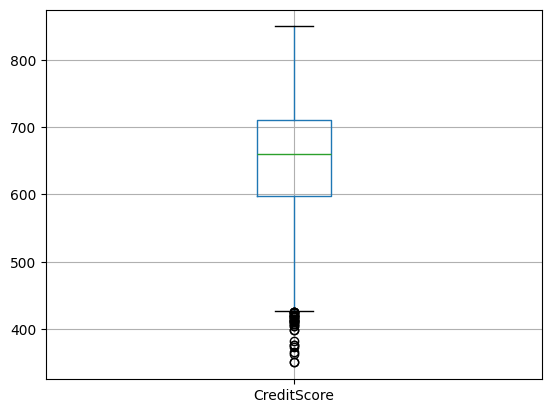

In [20]:
#Check Outliers
boxplot = x_train.boxplot(column=['CreditScore'])
plt.show()

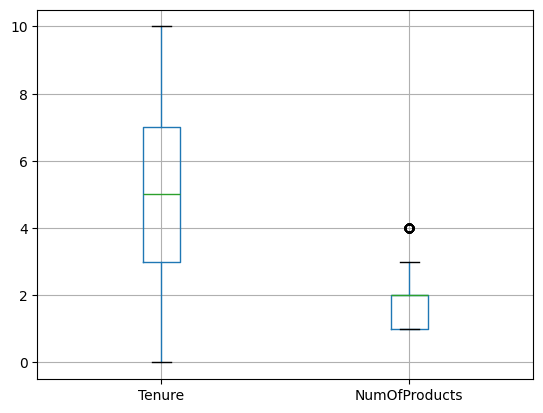

In [21]:
boxplot = x_train.boxplot(column=['Tenure', 'NumOfProducts'])
plt.show()

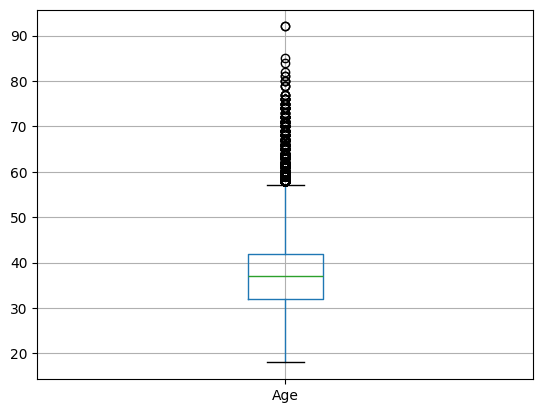

In [22]:
boxplot = x_train.boxplot(column=['Age'])
plt.show()

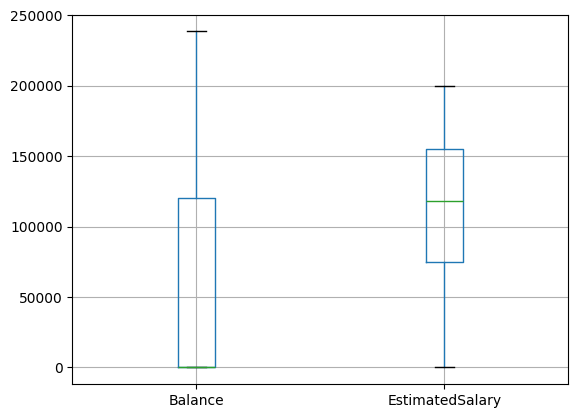

In [23]:
boxplot = x_train.boxplot(column=['Balance', 'EstimatedSalary'])
plt.show()

In [24]:
from scipy import stats
t = ['CreditScore', 'NumOfProducts', 'Age']
temp = x_train[t]
z_scores = stats.zscore(temp)
threshold = 3
outlier_indices = (np.abs(z_scores) > threshold).any(axis=1)
x_train = x_train[~outlier_indices]
y_train = y_train[~outlier_indices]

temp = x_test[t]
z_scores = stats.zscore(temp)
threshold = 3
outlier_indices = (np.abs(z_scores) > threshold).any(axis=1)
x_test = x_test[~outlier_indices]
y_test = y_test[~outlier_indices]

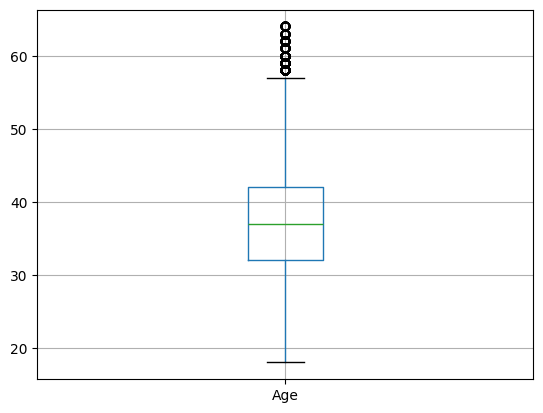

In [25]:
boxplot = x_train.boxplot(column=['Age'])
plt.show()

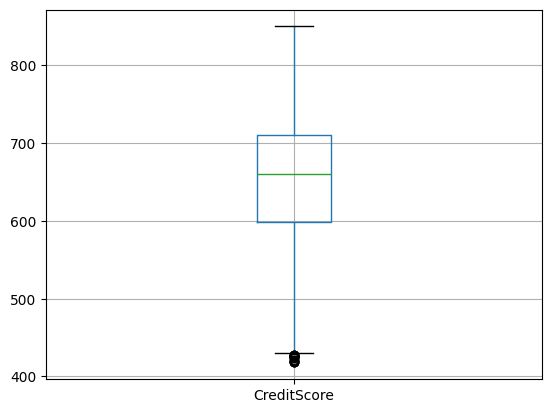

In [26]:
boxplot = x_train.boxplot(column=['CreditScore'])
plt.show()

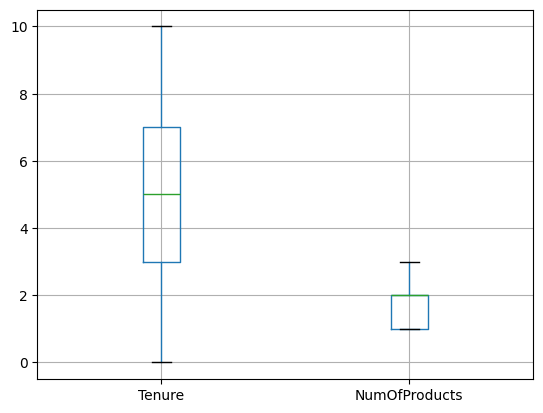

In [27]:
boxplot = x_train.boxplot(column=['Tenure', 'NumOfProducts'])
plt.show()

In [28]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32514 entries, 15731 to 860
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      32514 non-null  float64
 1   Geography        32514 non-null  object 
 2   Gender           32514 non-null  object 
 3   Age              32514 non-null  float64
 4   Tenure           32514 non-null  int64  
 5   Balance          32514 non-null  float64
 6   NumOfProducts    32514 non-null  int64  
 7   HasCrCard        32514 non-null  int64  
 8   IsActiveMember   32514 non-null  int64  
 9   EstimatedSalary  32514 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 2.7+ MB


In [29]:
df.Geography.value_counts()

Geography
France     23518
Spain       9114
Germany     8626
Name: count, dtype: int64

In [30]:
df.Gender.value_counts()

Gender
Male      23341
Female    17917
Name: count, dtype: int64

In [31]:
#Binary Encoding Gender
encode={"Gender": {"Male":1,"Female" :0}}
x_train=x_train.replace(encode)
x_test=x_test.replace(encode)

In [32]:
filename = 'gender_encode.pkl'
pkl.dump(encode, open(filename, 'wb'))

In [33]:
#One Hot Encoding Geography
from sklearn.preprocessing import OneHotEncoder

geo_enc_train=x_train[['Geography']]
geo_enc_test=x_test[['Geography']]

geoencoder=OneHotEncoder()

geo_enc_train=pd.DataFrame(geoencoder.fit_transform(geo_enc_train).toarray(),columns=geoencoder.get_feature_names_out())

geo_enc_test=pd.DataFrame(geoencoder.fit_transform(geo_enc_test).toarray(),columns=geoencoder.get_feature_names_out())

x_train=x_train.reset_index()
x_test=x_test.reset_index()

x_train_enc=pd.concat([x_train,geo_enc_train], axis=1)
x_test_enc=pd.concat([x_test,geo_enc_test], axis=1)

In [34]:
x_train_enc.head()

,index,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,15731,634.0,France,1,53.0,2,181821.96,2,1,1,36980.54,1.0,0.0,0.0
1,6996,581.0,France,0,50.0,9,117565.03,2,0,0,82559.77,1.0,0.0,0.0
2,30824,545.0,France,1,34.0,9,0.00,2,1,0,66393.89,1.0,0.0,0.0
3,40019,543.0,Spain,1,26.0,10,117837.43,1,1,0,160528.65,0.0,0.0,1.0
4,21501,733.0,Spain,1,48.0,9,0.00,1,1,0,127569.80,0.0,0.0,1.0


In [35]:
geoencoder.get_feature_names_out()

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [36]:
filename = 'geo_encode.pkl'
pkl.dump(geoencoder, open(filename, 'wb'))

# Modeling

In [37]:
x_train_enc = x_train_enc.drop(['index', 'Geography'], axis=1)
x_test_enc = x_test_enc.drop(['index', 'Geography'], axis=1)

In [38]:
x_train_enc.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,634.0,1,53.0,2,181821.96,2,1,1,36980.54,1.0,0.0,0.0
1,581.0,0,50.0,9,117565.03,2,0,0,82559.77,1.0,0.0,0.0
2,545.0,1,34.0,9,0.00,2,1,0,66393.89,1.0,0.0,0.0
3,543.0,1,26.0,10,117837.43,1,1,0,160528.65,0.0,0.0,1.0
4,733.0,1,48.0,9,0.00,1,1,0,127569.80,0.0,0.0,1.0


In [39]:
x_train_enc.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

### Random Forest

In [40]:
RF_class = RandomForestClassifier(criterion= 'gini',max_depth=4)
RF_class.fit(x_train_enc, y_train)

RandomForestClassifier(max_depth=4)

In [41]:
y_predict=RF_class.predict(x_test_enc)

In [42]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['1','0']))


Classification Report

              precision    recall  f1-score   support

           1       0.85      0.98      0.91      6457
           0       0.82      0.35      0.50      1668

    accuracy                           0.85      8125
   macro avg       0.84      0.67      0.70      8125
weighted avg       0.85      0.85      0.83      8125



### XGBoost

In [55]:
#Train the XGboost Model for Classification
model = xgb.XGBClassifier(n_estimators=500, max_depth=4, learning_rate=0.1, subsample=0.5)

train_model = model.fit(x_train_enc, y_train)

In [56]:
pred = train_model.predict(x_test_enc)

print('\nClassification Report\n')
print(classification_report(y_test, pred, target_names=['1','0']))


Classification Report

              precision    recall  f1-score   support

           1       0.89      0.95      0.92      6457
           0       0.73      0.55      0.63      1668

    accuracy                           0.86      8125
   macro avg       0.81      0.75      0.77      8125
weighted avg       0.86      0.86      0.86      8125



# Evaluasi Model

### Random Forest
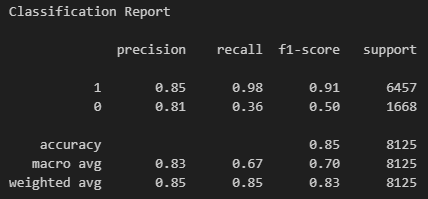

### XGBoost
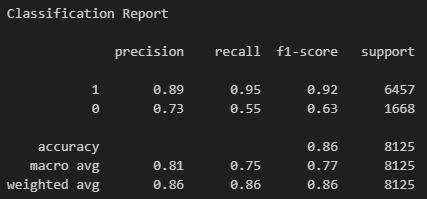

Bisa dilihat bahwa performa XGBoost lebih baik daripada Random Forest, khususnya saat mengklasifikasi output 0. Oleh karena itu, saya akan memakai XGBoost untuk deployment.

In [57]:
filename = 'XGB_churn.pkl'
pkl.dump(model, open(filename, 'wb'))

# Checking

In [45]:
x_train_enc.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [50]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
count,41258.000000,4.125800e+04,41238.000000,41258.000000,41258.000000,41258.000000,41258.000000,41258.000000,41258.000000,41258.000000,41258.000000
mean,82427.097751,1.569184e+07,657.212619,38.113117,5.020408,55845.162728,1.554801,0.753817,0.501018,112741.993562,0.208760
std,47686.245457,7.150911e+04,80.324627,8.825835,2.798614,62912.415027,0.545583,0.430791,0.500005,50293.991764,0.406427
min,6.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41244.500000,1.563291e+07,598.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74838.207500,0.000000
50%,82102.000000,1.569016e+07,661.000000,37.000000,5.000000,0.000000,2.000000,1.000000,1.000000,118711.750000,0.000000
75%,123874.250000,1.575690e+07,711.000000,42.000000,7.000000,120139.762500,2.000000,1.000000,1.000000,155642.645000,0.000000
max,165030.000000,1.581569e+07,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [53]:
#Binary Encoding CrCard
crencoder={"HasCrCard": {"Yes":1,"No" :0}}
filename = 'cr_encode.pkl'
pkl.dump(crencoder, open(filename, 'wb'))

In [54]:
#Binary Encoding Active Member
ACencoder={"IsActiveMember": {"Yes":1,"No" :0}}
filename = 'active_encode.pkl'
pkl.dump(ACencoder, open(filename, 'wb'))